Polynominterpolation ist nicht gut geeignet, Funktionen in der Nähe eines Pols oder mit starken Extrema zu approximieren (siehe das Runge-Beispiel). Hier hilft die rationale Interpolation.

In [1]:
%%capture
%run Polynominterpolation.ipynb
%run Tschebyscheff-Interpolation.ipynb

Wir setzen $$r(x)=\frac{p(x)}{q(x)}$$ und (der Einfachheit halber) $p(0)=1$.

Wir setzen an $$p(x)=\sum_{k=0}^n p_k x^k,\,q(x)=\sum_{k=0}^m q_k x^k$$
mit $p_0=1$. Wir benötigen Stützstellen $x_k$, $k=0\ldots N=n+m$, zur Berechnung. Wir nutzen erstmal wieder das Runge-Beispiel (das ist natürlich hier nicht sonderlich sinnvoll - das wird uns die Runge-Funktion exakt zurückliefern) bei äquidistanten Stützstellen.

[-1.3249e-16 -2.1464e-17  1.0000e+00] [ 2.5000e+01 -5.5807e-16  1.0000e+00]


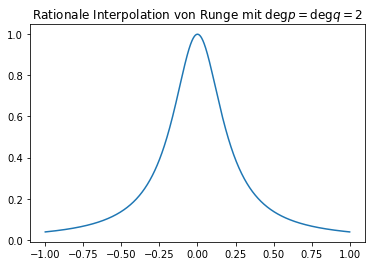

In [2]:
def rational_interp(t,y,n,m):
    N=n+m
    if (len(t)!=(N+1)):
        print('Falsche Länge.');
        raise(ValueError);
    A=np.zeros([N+2,N+2]);
    for i in range(0,N+1):
        z=t[i]
        for j in range(0,n+1):
            A[i,j]=z**(n-j)
        for j in range(0,m+1):
            A[i,n+1+j]=-z**(m-j)*y[i]
    A[N+1,n]=1
    newy=np.zeros(N+2)
    newy[N+1]=1
    coeff=np.linalg.solve(A,newy)
    p=coeff[0:n+1]
    q=coeff[n+1:N+2]
    return (p,q)

def r_eval(p,q,x):
    return np.polyval(p,x)/np.polyval(q,x)

np.set_printoptions(precision=4)
runge=1/(1+25*x*x)
n=2
m=2
N=n+m
t=np.linspace(-1,1,N+1)
y=[float(runge.subs(x,z)) for z in t]
(p,q)=rational_interp(t,y,n,m)
print(p,q)
X=np.linspace(-1,1,1024)
Y=[r_eval(p,q,z) for z in X]
plt.plot(X,Y)
plt.title('Rationale Interpolation von Runge mit $\deg p=\deg q=2$');

Dieser Test hat funktioniert, war aber sinnlos: Für den Polynomgrad 2 im Nenner bekommen wir exakt die Runge-Funktion wieder heraus. Wir probieren es mit Polynomgrad 4 im Nenner und Zähler.

[ 1.7794e-15  3.0346e-18 -1.1000e+01  4.2674e-17  1.0000e+00] [-2.7500e+02  1.1884e-15  1.4000e+01 -0.0000e+00  1.0000e+00]


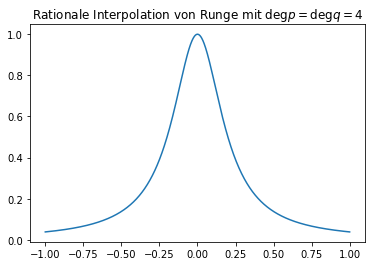

In [3]:
n=4
m=4
N=n+m
t=np.linspace(-1,1,N+1)
y=[float(runge.subs(x,z)) for z in t]
(p,q)=rational_interp(t,y,n,m)
print(p,q)
X=np.linspace(-1,1,1024)
Y=[r_eval(p,q,z) for z in X]
plt.plot(X,Y)
plt.title('Rationale Interpolation von Runge mit $\deg p=\deg q=4$');

Tatsächlich kann man das erzeugte Polynom kürzen, und es ist wieder das Runge-Polynom.

Abschließend noch die Gauss-Funktion $exp(-x^2/2)$.

[ 2.5976e-03  2.0671e-20 -1.0492e-01 -5.1862e-19  1.0000e+00] [ 1.9745e-01 -2.1490e-17  2.2908e-01  4.4310e-17  1.0000e+00]


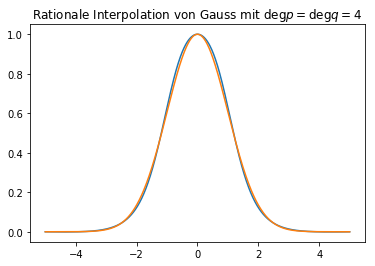

In [4]:
gauss=sympy.exp(-x*x/2)
n=4
m=4
N=n+m
t=np.linspace(-5,5,N+1)
y=[float(gauss.subs(x,z)) for z in t]
(p,q)=rational_interp(t,y,n,m)
print(p,q)
X=np.linspace(-5,5,1024)
Y=[r_eval(p,q,z) for z in X]
Y0=[gauss.subs(x,z) for z in X]
plt.plot(X,Y,X,Y0)
plt.title('Rationale Interpolation von Gauss mit $\deg p=\deg q=4$');

Nun der Vergleich mit äquidistanter polynomialer Interpolation.

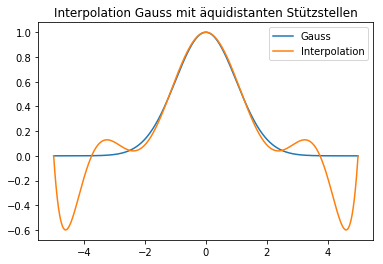

In [5]:
t_aequi=np.linspace(-5,5,9)
y_aequi=[float(gauss.subs(x,z)) for z in t_aequi]
coeff=poly_coeff(t_aequi,y_aequi)
Y_AE=[np.polyval(coeff,z) for z in X]
plt.plot(X,Y0,X,Y_AE)
plt.title('Interpolation Gauss mit äquidistanten Stützstellen')
plt.legend(['Gauss','Interpolation']);

Und Vergleich mit Tschebyscheff.

[ 3.9508  3.564   2.8284  1.816   0.6257 -0.6257 -1.816  -2.8284 -3.564
 -3.9508]


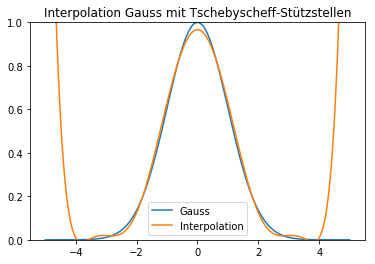

In [9]:
n=10
t_tscheb=np.array(tscheb_stuetz(n))*4
print(t_tscheb)
y_tscheb=[float(gauss.subs(x,z)) for z in t_tscheb]
coeff=poly_coeff(t_tscheb,y_tscheb)
Y_TS=[np.polyval(coeff,z) for z in X]
plt.plot(X,Y0,X,Y_TS)
plt.title('Interpolation Gauss mit Tschebyscheff-Stützstellen')
plt.ylim([0,1])
plt.legend(['Gauss','Interpolation']);